In [164]:
import pandas as pd

#### Use Pandas read_csv to load the us-counties.csv file.

The columns of the CSV file are:

date   - The date as a string (don't forget to convert this to a `pd.datetime`)

county - The name of the county

state  - The name of the state

fips   - The fips code of the county (the first two digits represent the state, the last three, the county)

cases  - The cumulative number of cases at the date in the county

deaths - The cumulative number of deaths in at the date in the county

In [165]:
df = pd.read_csv("us-counties.csv")
df['date'] = pd.to_datetime(df['date'])
df.head(10)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
5,2020-01-25,Orange,California,6059.0,1,0.0
6,2020-01-25,Cook,Illinois,17031.0,1,0.0
7,2020-01-25,Snohomish,Washington,53061.0,1,0.0
8,2020-01-26,Maricopa,Arizona,4013.0,1,0.0
9,2020-01-26,Los Angeles,California,6037.0,1,0.0


#### Question 1: Produce a DataFrame that contains only the data for the top 10 Counties by total number of cases

In [166]:
df_10_counties = df.groupby('fips').max()
df_10_counties = df_10_counties.sort_values(by=['cases'], ascending=False)
df_10_counties = df_10_counties.set_index('county')
df_10_counties = df_10_counties.head(10)
df_10_counties

,date,state,cases,deaths
county,,,,
Los Angeles,2021-10-03,California,1463743,26153.0
Maricopa,2021-10-03,Arizona,700319,11558.0
Miami-Dade,2021-10-03,Florida,661638,8504.0
Cook,2021-10-03,Illinois,620602,11603.0
Harris,2021-10-03,Texas,558618,8414.0
Dallas,2021-10-03,Texas,389318,4931.0
San Diego,2021-10-03,California,373289,4078.0
Riverside,2021-10-03,California,363950,5004.0
San Bernardino,2021-10-03,California,351963,5545.0


####  Question 2: Produce a DataFrame that contains only the data for the top 5 states by total number of cases

In [167]:
df_5_states = df.groupby('state').max()
df_5_states = df_5_states.sort_values(by=['cases'], ascending=False)
df_5_states = df_5_states.head(10)
df_5_states

,date,county,fips,cases,deaths
state,,,,,
California,2021-10-03,Yuba,6115.0,1463743,26153.0
New York,2021-10-03,Yates,36123.0,1085590,34284.0
Arizona,2021-10-03,Yuma,4027.0,700319,11558.0
Florida,2021-10-03,Washington,12133.0,661638,11799.0
Illinois,2021-10-03,Woodford,17203.0,620602,11603.0
Texas,2021-10-03,Zavala,48507.0,558618,8414.0
Nevada,2021-10-03,White Pine,32510.0,320777,5660.0
Michigan,2021-10-03,Wexford,26165.0,187216,5422.0
Utah,2021-10-03,Weber,49057.0,183169,1084.0


#### Question 3: Calculate the incidence (the number of new cases per day... i.e. the difference between the cases on a day - the cases on a previous day) for the top 10 Counties.

In [168]:
# Need to create a data frame that has all of the dates for the top 10 counties
df_10_counties = df_10_counties.reset_index()
df_all_dates = df[(df['county'].isin(df_10_counties['county'])) & (df['state'].isin(df_10_counties['state']))]
df_all_dates.head(10)

,date,county,state,fips,cases,deaths
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
6,2020-01-25,Cook,Illinois,17031.0,1,0.0
8,2020-01-26,Maricopa,Arizona,4013.0,1,0.0
9,2020-01-26,Los Angeles,California,6037.0,1,0.0
11,2020-01-26,Cook,Illinois,17031.0,1,0.0
13,2020-01-27,Maricopa,Arizona,4013.0,1,0.0
14,2020-01-27,Los Angeles,California,6037.0,1,0.0
16,2020-01-27,Cook,Illinois,17031.0,1,0.0
18,2020-01-28,Maricopa,Arizona,4013.0,1,0.0
19,2020-01-28,Los Angeles,California,6037.0,1,0.0


In [169]:
%%time
def get_incidence_index(row, df_all_dates):
    prev_index = (row.name[0], pd.to_datetime(row.name[1])-pd.offsets.Day(1))
    if prev_index in df_all_dates.index: 
        return row['cases'] - df_all_dates.loc[prev_index]['cases']
    else:
        return 0
    
df_all_dates = df_all_dates.set_index(['county', 'date'])
df_all_dates['incidence_ind'] = df_all_dates.apply(lambda x: get_incidence_index(x, df_all_dates),axis=1)
df_all_dates.head(10)

CPU times: user 2.87 s, sys: 15.4 ms, total: 2.88 s
Wall time: 2.89 s


state     fips  cases  deaths  incidence_ind
county      date                                                         
Cook        2020-01-24    Illinois  17031.0      1     0.0              0
            2020-01-25    Illinois  17031.0      1     0.0              0
Maricopa    2020-01-26     Arizona   4013.0      1     0.0              0
Los Angeles 2020-01-26  California   6037.0      1     0.0              0
Cook        2020-01-26    Illinois  17031.0      1     0.0              0
Maricopa    2020-01-27     Arizona   4013.0      1     0.0              0
Los Angeles 2020-01-27  California   6037.0      1     0.0              0
Cook        2020-01-27    Illinois  17031.0      1     0.0              0
Maricopa    2020-01-28     Arizona   4013.0      1     0.0              0
Los Angeles 2020-01-28  California   6037.0      1     0.0              0

#### Question 4: Calculate the peak incidence for the 10 counties (the day with the highest number of new cases).

In [170]:
df_all_dates = df_all_dates.reset_index()
peaks_df = df_all_dates.iloc[df_all_dates.groupby('county')['incidence_ind'].idxmax()]
peaks_df = peaks_df.set_index('county')
peaks_df = peaks_df.sort_values(by= "incidence_ind", ascending= False)
peaks_df.head(10)

,date,state,fips,cases,deaths,incidence_ind
county,,,,,,
Los Angeles,2020-12-26,California,6037.0,706712,9438.0,29174
Miami-Dade,2021-08-13,Florida,12086.0,583845,6472.0,21655
San Diego,2021-07-01,California,6073.0,298015,3780.0,15453
Broward,2021-08-13,Florida,12011.0,295646,3079.0,14666
Harris,2020-09-21,Texas,48201.0,137946,2505.0,14129
Maricopa,2021-01-03,Arizona,4013.0,342994,5239.0,11761
Riverside,2021-01-12,California,6065.0,227827,2294.0,8341
San Bernardino,2020-12-16,California,6071.0,137548,1304.0,8026
Cook,2020-11-01,Illinois,17031.0,193102,5500.0,6697


#### Question 5: Plot an incidence curve for the County with the highest peak.

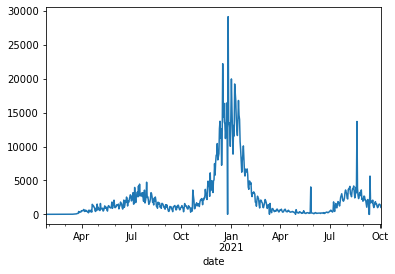

In [171]:
df_all_dates = df_all_dates.set_index(['county', 'date'])
df_all_dates['incidence_ind'] = df_all_dates.apply(lambda x: get_incidence_index(x, df_all_dates),axis=1)
df_all_dates.loc['Los Angeles']['incidence_ind'].plot()

#### Question 6: Plot a vertical bar graph with County as the category and the peak incidence as the measure.

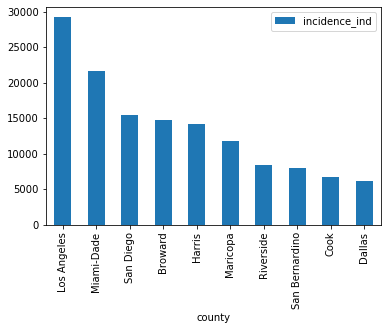

In [172]:
peaks_df[['incidence_ind']].plot.bar()